
<div class="alert alert-info">

**This is a fixed-text formatted version of a Jupyter notebook**

- Try online [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/gammapy/gammapy-webpage/v0.10?urlpath=lab/tree/detect_ts.ipynb)
- You can contribute with your own notebooks in this
[GitHub repository](https://github.com/gammapy/gammapy/tree/master/tutorials).
- **Source files:**
[detect_ts.ipynb](../_static/notebooks/detect_ts.ipynb) |
[detect_ts.py](../_static/notebooks/detect_ts.py)
</div>


# Source detection with Gammapy

## Introduction

This notebook show how to do source detection with Gammapy using one of the methods available in [gammapy.detect](../detect/index.rst).

We will do this:

* produce 2-dimensional test-statistics (TS) images using Fermi-LAT 3FHL high-energy Galactic center dataset
* run a peak finder to make a source catalog
* do some simple measurements on each source
* compare to the 3FHL catalog

Note that what we do here is a quick-look analysis, the production of real source catalogs use more elaborate procedures.

We will work with the following functions and classes:

* [gammapy.maps.WcsNDMap](../api/gammapy.maps.WcsNDMap.rst)
* [gammapy.detect.TSMapEstimator](../api/gammapy.detect.TSMapEstimator.rst)
* [gammapy.detect.find_peaks](../api/gammapy.detect.find_peaks.rst)

## Setup

As always, let's get started with some setup ...

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from astropy import units as u
from gammapy.maps import Map
from gammapy.detect import TSMapEstimator, find_peaks
from gammapy.catalog import source_catalogs
from gammapy.cube import PSFKernel

## Read in input images

We first read in the counts cube and sum over the energy axis:

In [3]:
counts = Map.read("$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-counts.fits.gz")
background = Map.read(
    "$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-background.fits.gz"
)
exposure = Map.read(
    "$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-exposure.fits.gz"
)

maps = {"counts": counts, "background": background, "exposure": exposure}

kernel = PSFKernel.read(
    "$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-psf.fits.gz"
)

In [4]:
%%time
estimator = TSMapEstimator()
images = estimator.run(maps, kernel.data)

CPU times: user 746 ms, sys: 87.6 ms, total: 834 ms
Wall time: 11 s


## Plot images

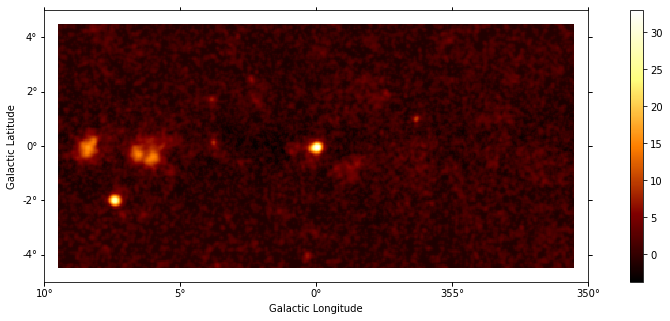

In [5]:
plt.figure(figsize=(15, 5))
images["sqrt_ts"].plot(add_cbar=True);

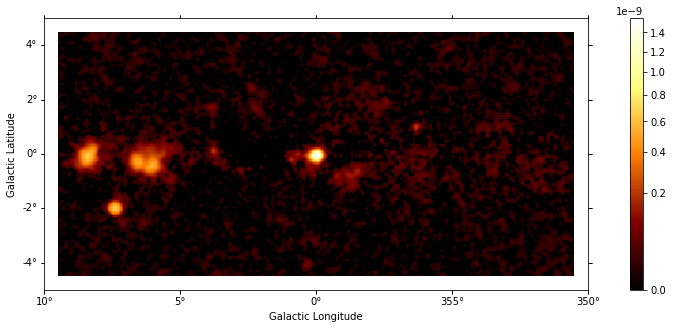

In [6]:
plt.figure(figsize=(15, 5))
images["flux"].plot(add_cbar=True, stretch="sqrt", vmin=0);

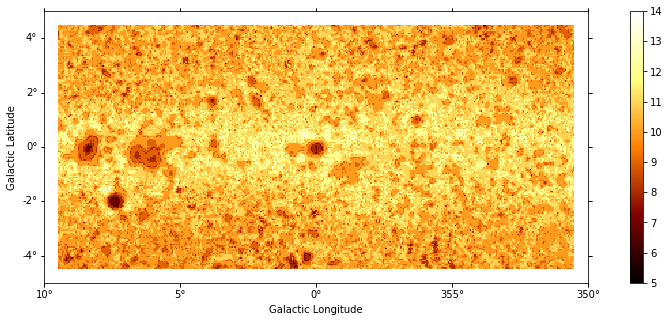

In [7]:
plt.figure(figsize=(15, 5))
images["niter"].plot(add_cbar=True);

## Source catalog

Let's run a peak finder on the `sqrt_ts` image to get a list of sources (positions and peak `sqrt_ts` values).

In [8]:
sources = find_peaks(images["sqrt_ts"], threshold=8)
sources

<Table length=8>
 value    x     y       ra       dec   
                       deg       deg   
float64 int64 int64  float64   float64 
------- ----- ----- --------- ---------
 32.972   200    99 266.41449 -28.97054
 27.995    52    60 272.43197 -23.54282
  16.18    32    98 271.16056 -21.74479
 14.939    69    93 270.40919 -23.47797
 14.842    80    92 270.15899 -23.98049
 13.951    36   102 270.86716 -21.82076
 9.7245   273   119 263.18257 -31.52587
 8.8532   124   102 268.46711 -25.63326

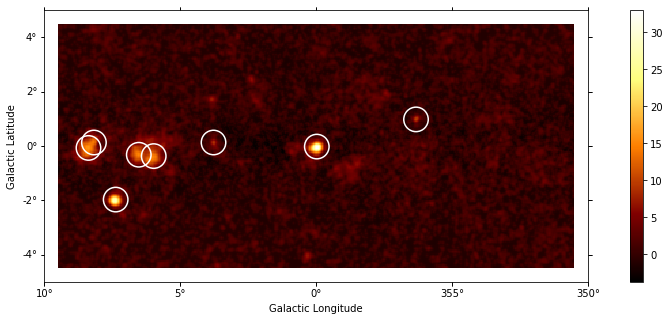

In [9]:
# Plot sources on top of significance sky image
plt.figure(figsize=(15, 5))

_, ax, _ = images["sqrt_ts"].plot(add_cbar=True)

ax.scatter(
    sources["ra"],
    sources["dec"],
    transform=plt.gca().get_transform("icrs"),
    color="none",
    edgecolor="w",
    marker="o",
    s=600,
    lw=1.5,
);

## Measurements

* TODO: show cutout for a few sources and some aperture photometry measurements (e.g. energy distribution, significance, flux)

In [10]:
# TODO

## Compare to 3FHL

TODO

In [11]:
fermi_3fhl = source_catalogs["3fhl"]

In [12]:
selection = counts.geom.contains(fermi_3fhl.positions)
fermi_3fhl.table = fermi_3fhl.table[selection]

In [13]:
fermi_3fhl.table[["Source_Name", "GLON", "GLAT"]]

<Table masked=True length=22>
   Source_Name       GLON     GLAT  
                     deg      deg   
     bytes18       float32  float32 
------------------ -------- --------
3FHL J1731.7-3003  357.4511   1.9489
3FHL J1732.6-3131  356.3192   0.9981
3FHL J1741.8-2536    2.3923   2.4610
3FHL J1744.5-2609    2.2387   1.6537
3FHL J1745.6-2900  359.9423  -0.0497
3FHL J1745.8-3028e 358.7080  -0.8370
3FHL J1746.2-2852    0.1225  -0.0882
3FHL J1747.2-2959  359.2745  -0.8456
3FHL J1747.2-2822    0.6775  -0.0182
               ...      ...      ...
3FHL J1753.8-2537    3.7706   0.1398
3FHL J1800.5-2343e   6.1952  -0.2333
3FHL J1800.7-2357    6.0099  -0.3812
3FHL J1801.5-2450    5.3311  -0.9750
3FHL J1801.6-2327    6.5336  -0.3132
3FHL J1802.3-3043    0.2988  -4.0414
3FHL J1803.1-2148    8.1470   0.1906
3FHL J1804.7-2144e   8.3974  -0.0948
3FHL J1809.8-2332    7.3904  -1.9952
3FHL J1811.2-2800    3.6168  -4.4098

## Exercises

TODO: put one or more exercises

In [14]:
# Start exercises here!

## What next?

In this notebook, we have seen how to work with images and compute TS images from counts data, if a background estimate is already available.

Here's some suggestions what to do next:

- TODO: point to background estimation examples
- TODO: point to other docs ...